# Modelos de Regresión Lineal
## Modelos con datos simulados

#### y=a+b*x
#### X = 100 valores distribuidos segun una N(1.5 , 2.5)
#### Ye = 5 + 1.9 * x + u
#### e = estara distribuida según una N(0, 0.8)

In [50]:
import pandas as pd
import numpy as np

In [51]:
x = 1.5 + 2.5 * np.random.randn(100)

In [52]:
res = 0 + 0.8 * np.random.randn(100)

In [53]:
y_pred = 5 + 1.9 * x

In [54]:
y_act = 5 + 1.9 * x + res

In [55]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [56]:
data = pd.DataFrame({
    "x":x_list,
    "y_actual":y_act_list,
    "y_prediccion":y_pred_list
})

In [57]:
data.head()

,x,y_actual,y_prediccion
0,-1.494459,1.078128,2.160528
1,-0.023253,4.950217,4.955820
2,2.021529,9.303787,8.840905
3,1.171532,6.681058,7.225912
4,5.574806,15.331512,15.592132


In [58]:
import matplotlib.pyplot as plt

In [59]:
y_mean = [np.mean(y_act)for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

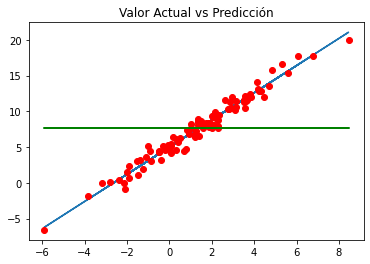

In [60]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor Actual vs Predicción")

In [61]:
data["SSR"] = (data["y_prediccion"]-np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"]-data["y_actual"])**2
data["SST"] = (data["y_actual"]-np.mean(y_act))**2

In [62]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,-1.494459,1.078128,2.160528,30.628387,1.171590,43.780611
1,-0.023253,4.950217,4.955820,7.502121,0.000031,7.532849
2,2.021529,9.303787,8.840905,1.313510,0.214260,2.588774
3,1.171532,6.681058,7.225912,0.219875,0.296866,1.027714
4,5.574806,15.331512,15.592132,62.367535,0.067923,58.319060


In [63]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [64]:
SSR

2012.6781467267517

In [65]:
SSD

70.81190641203524

In [66]:
SST

2050.1624602606857

In [67]:
SSR + SSD

2083.490053138787

In [68]:
R2 = SSR/SST

In [69]:
R2

0.9817164179617416

(array([ 1.,  5., 12., 10., 17., 23., 14.,  9.,  4.,  5.]),
 array([-2.06455046, -1.66540732, -1.26626417, -0.86712103, -0.46797788,
        -0.06883473,  0.33030841,  0.72945156,  1.1285947 ,  1.52773785,
         1.92688099]),
 <a list of 10 Patch objects>)

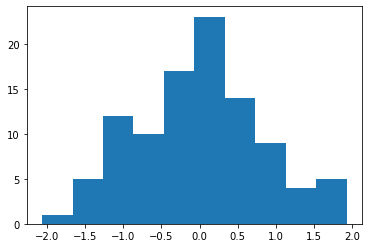

In [70]:
plt.hist(data["y_prediccion"]-data["y_actual"])